# Generating TAPobjects

TAPobjects consist of three primary components, including the specification of the reactor, reactor species (gasses, inert gasses, and adspecies), and the reaction mechansim. Additional specifications of the TAPobject include defining what processes should be run (simulation, optimization, uncertainty, etc.), as well as other simulation details (mesh size, catalyst zone density, etc.). Although TAP objects can be generated from scratch, it can be much easier to use this example (as well as other jupyter notebooks provided here) to copy and make your own.

## Import TAPsolver

First, install the tapsolver package, where all of the tap object specifications can be found.

In [27]:
from tapsolver import *

## Define the reactor object

A new reactor object can be generated with the following commmand

In [28]:
# Defining a reactor object
new_reactor = reactor()

After defining a new reactor object, there are three reactor inputs that need to be defined based on your reactor of interest. These are defined in the form of dictionaries (specifying each of the reactor zones) and floats.

In [78]:
# The length of each zone (cm)
new_reactor.zone_lengths = {0:1.8675,1:0.2,2:1.8675}

# The void fraction of the packed material (zone 1 [inert], zone 2 [catalyst], zone 3[inert])
new_reactor.zone_voids = {0:0.4,1:0.4,2:0.4}

# The micro (TAP) reactor radius (cm)
new_reactor.reactor_radius = 0.19

## Define the reactor species object

A new reactor species object can be generated with the following commmand

In [30]:
# Defining a reactor species object
new_reactor_species = reactor_species()

After defining the reactor species object, some additional details can be adjusted based on your own experiment

In [31]:
# The reference diffusion coefficient in the inert zone (cm2/s)
new_reactor_species.inert_diffusion = 27

# The reference diffusion coefficient in the catalyst zone (cm2/s)
new_reactor_species.catalyst_diffusion = 27

# The reference temperature in the reactor (K)
new_reactor_species.reference_temperature = 700

# The mass of the species used for defining the inert and catalyst diffusion coefficient (a.m.u.)
new_reactor_species.reference_mass = 40

# The temperature of the current reactor
new_reactor_species.temperature = 700

## Add reactive gasses to the reactor species object

Once the reactor species object is defined, we can add reactive gasses with the following. First, we define a gas (in this case propane)

In [32]:
# Defining a gas species
C3H8 = define_gas()

Next, we specify the properties of the molecule and the pulse

In [33]:
# The mass of the current gas c3h8 (a.m.u.)
C3H8.mass = 44.1

# The # of molecules being pulsed into the reactor (nmol)
C3H8.intensity = 1.0

# The time delay of the gas being fed (seconds)
C3H8.delay = 0

An optional choice for the gas specification is noise and sigma, which represents the signal noise in the pulse and factor to scale the object function by (often equal to noise), respectively.

In [63]:
# Scaling factor of the objective function
C3H8.sigma = 0.1

# Noise to be included in the forward direction (i.e. simulation) (nmol/s)
C3H8.noise = 0.4

Finally, we add the new propane gas to the reactor species object

In [79]:
# Add the gas to the reactor species object
new_reactor_species.add_gas('C3H8',C3H8)

Gas already defined in dictionary.


## Adding a new inert gas to the reactor species object 

Specifying an inert gas follows the same workflow

In [65]:
# Same specifications as c3h8
Ar = define_gas()
Ar.mass = 44.1
Ar.intensity = 1
Ar.delay = 0.0
Ar.noise = 0.01
Ar.sigma = 0.02

The only difference is the addition process

In [66]:
new_reactor_species.add_inert_gas('Ar',Ar)

## Adding a new adspecies to the reactor species object

Adspecies are added in a similar way to that of the gasses

In [67]:
# Define a new surface species
s = define_adspecies()

# Define the surface concentration (typically nmol/cm3)
s.concentration = 0

# Add the surface species to the reactor species object
new_reactor_species.add_adspecies('C3H8*',s)

Gas already defined in dictionary.


And an active site can be added as 

In [68]:
# Same as for c3h8*
s = define_adspecies()
s.concentration = 120
new_reactor_species.add_adspecies('*',s)

Gas already defined in dictionary.


## Defining the mechanism

In [ ]:
The last major component to the TAPobject is the 

In [69]:
new_mechanism = mechanism()

In [70]:
new_mechanism.elementary_processes[0] = elementary_process('C3H8 + * <-> C3H8*')

In [71]:
new_mechanism.elementary_processes[0].forward.k = 10
new_mechanism.elementary_processes[0].backward.k = 5

In [72]:
for j in new_mechanism.elementary_processes:
	new_mechanism.elementary_processes[j].forward.use = 'k'
try:
	new_mechanism.elementary_processes[j].backward.use = 'k'
except:
	pass

In [73]:
mechanism_constructor(new_mechanism)

## Finalizing the TAPobject (Bringing it all together)

In [74]:
# Defining a general TAPobject
opdh_1 = TAPobject()

In [75]:
# Adding the previously specified objects to the TAPobject
opdh_1.mechanism = new_mechanism
opdh_1.reactor_species = new_reactor_species
opdh_1.reactor = new_reactor

## Storing the TAPobject

In [81]:
# Store the TAPobject 
save_object(opdh_1,'./example_TAPobject')

no experimental data


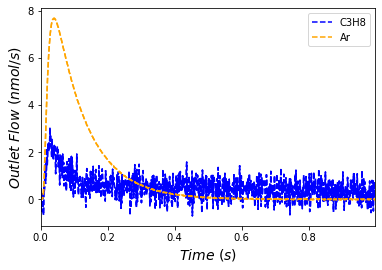

SystemExit: 

In [77]:
forward_problem(1,1,opdh_1)
flux_graph(opdh_1)